# **EXPLORATORY DATA ANALYSIS**

## Objectives

 * We will explore the data using Pandas profiling
 * Understanding the relationship between the most relevant variables and its correlation to churned customer

## Inputs

 * outputs/datasets/collection/BankCustomerChurn.csv

## Outputs

 * Report from the Pandas Profile dataset.
    * Generate code and plot graphs that answers business requirements

## Additional Information
 * Feature Engineering Transformers: 
OrdinalCcategorical Encoding


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Bank-Customer-Churn-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Bank-Customer-Churn-Prediction'

# Load data

We load the dataset output from the Data Collection notebook and drop "customer_id" from the columns

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BankCustomerChurn.csv")
     .drop(['customer_id'], axis=1)
     )
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---

# Data Exploration With Panda Profile Report

In [5]:
import pandas as pd
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Distribution Analysis

In [6]:
df.select_dtypes(include='object').describe(include='all')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


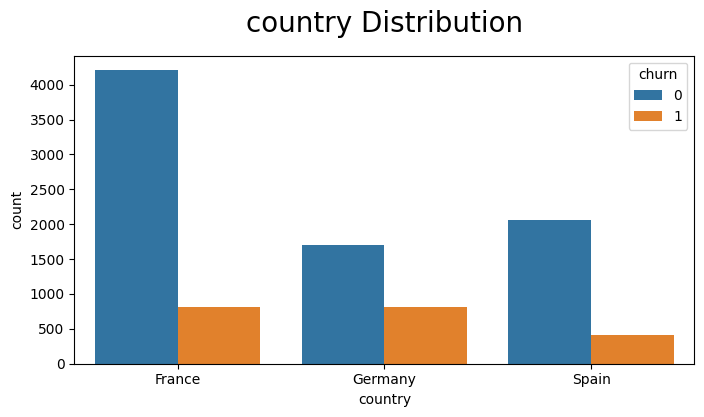

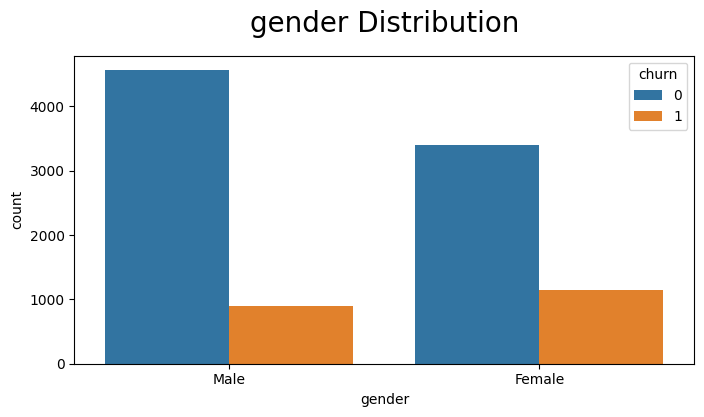

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

# Plot Categorical data in bar plot

for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=col, hue='churn', order=df[col].value_counts().index)
  plt.title(f"{col} Distribution", fontsize=20, y=1.05)
  plt.show()
  print("\n")

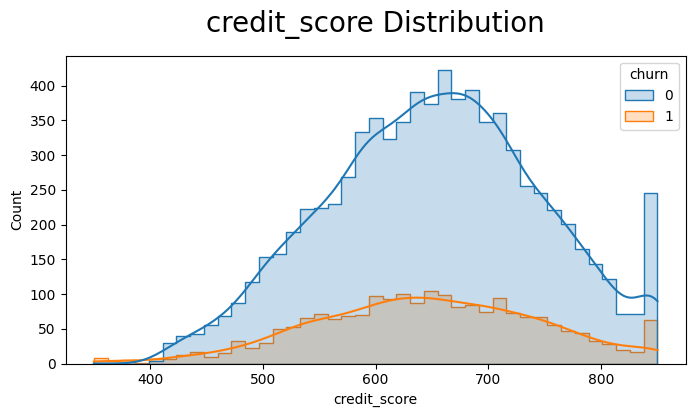

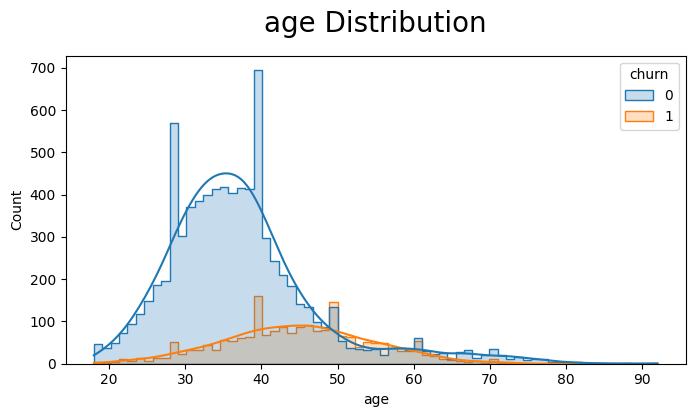

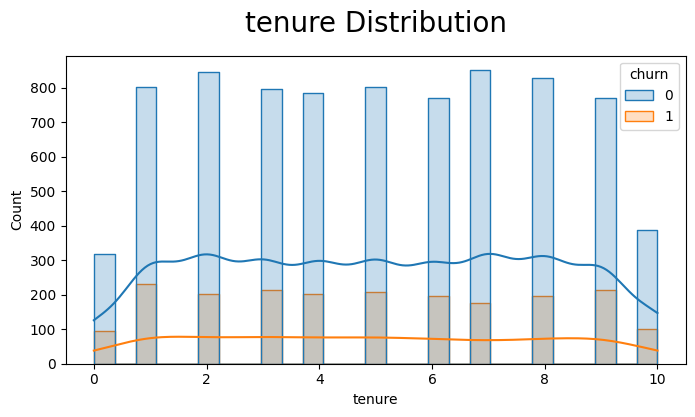

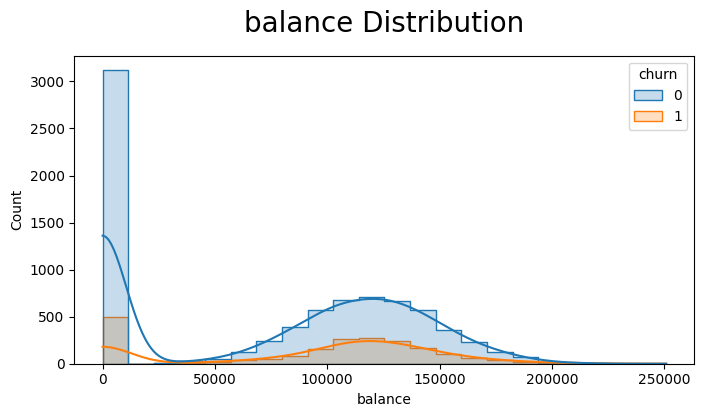

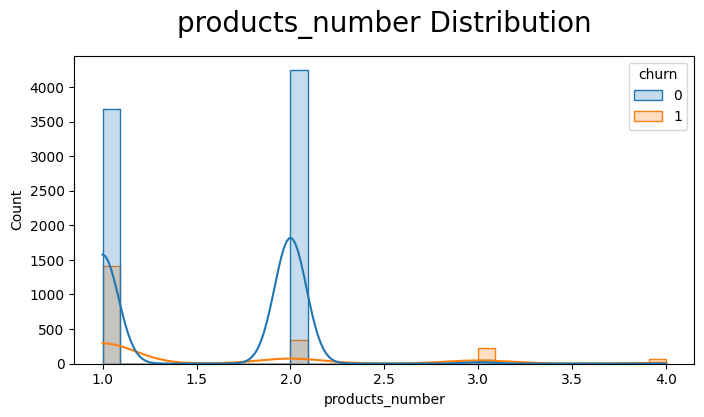

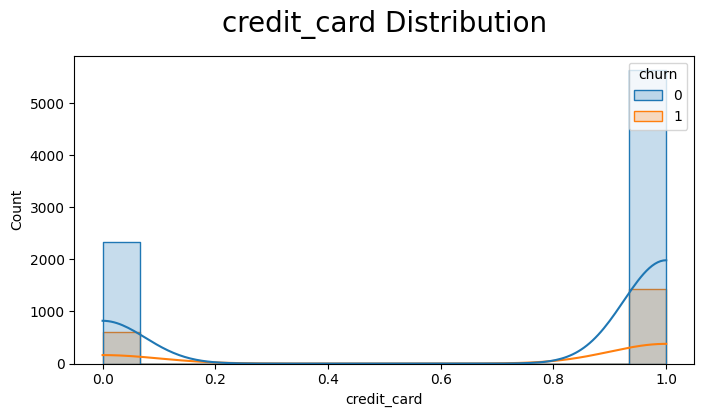

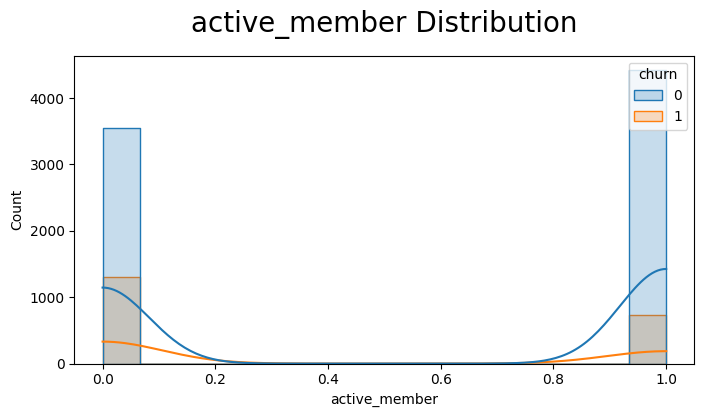

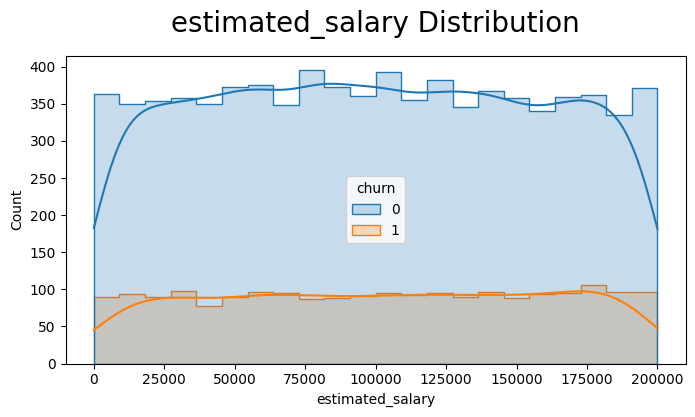

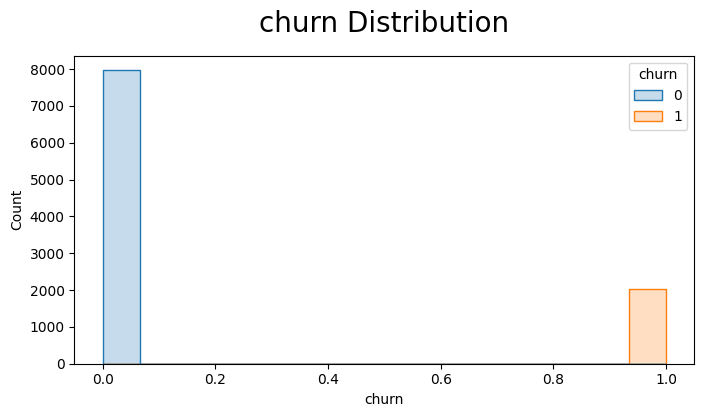

In [8]:
# Plot Numerical distribution in histogram

for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, hue='churn', kde=True, element='step')
  plt.title(f"{col} Distribution", fontsize=20, y=1.05)
  plt.show();
  print("\n\n")

The Panda profile Report indicate: 
 * The dataset have a predominance of numerical variables.
 * The target variable (churn) is imbalance

Churn - is the Target variable and it takes value 1 where a customer has left during some period or not and 0 for remain (1 = churn, 0 = not churned).

# Correlation Study

Exploring the combine Correlation Study and Predictive Power Score (PPS) to analyse how Churn correlates to the variables

A custom functnsio (taken from my Code Institute lessons where a combined correlation analysis (Pearson and Spearman) and PPwa is us.ed

In [9]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OrdinalEncoder
encoder = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(encoding_method='arbitrary'))
])


In [10]:
df = encoder.fit_transform(df)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix

    # return pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):


# def DisplayCorrAndPPS(pps_matrix, PPS_Threshold,
#                       figsize=(20, 12), font_annot=8):
    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Call CalculateCorrAndPPS function to calculate the Correlation levels and PPS Scores in the matrix

In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%  75%    max
ppscore  110.0  0.003  0.014  0.0  0.0  0.0  0.0  0.089




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



/tmp/ipykernel_927/3383299725.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


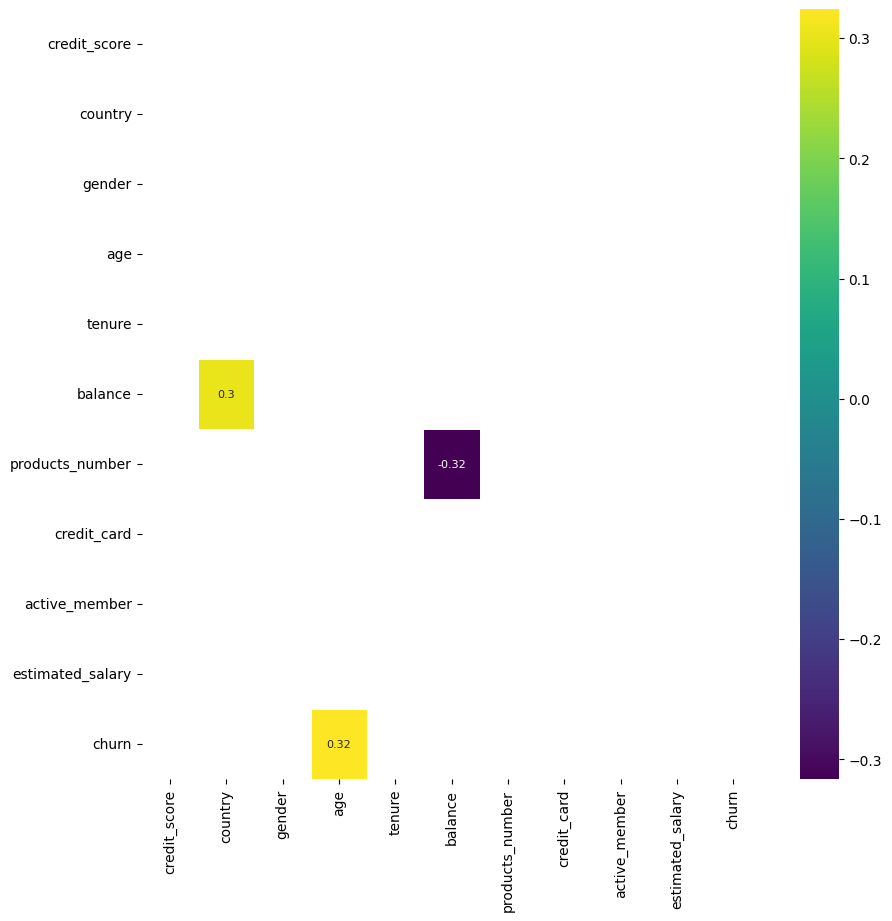



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



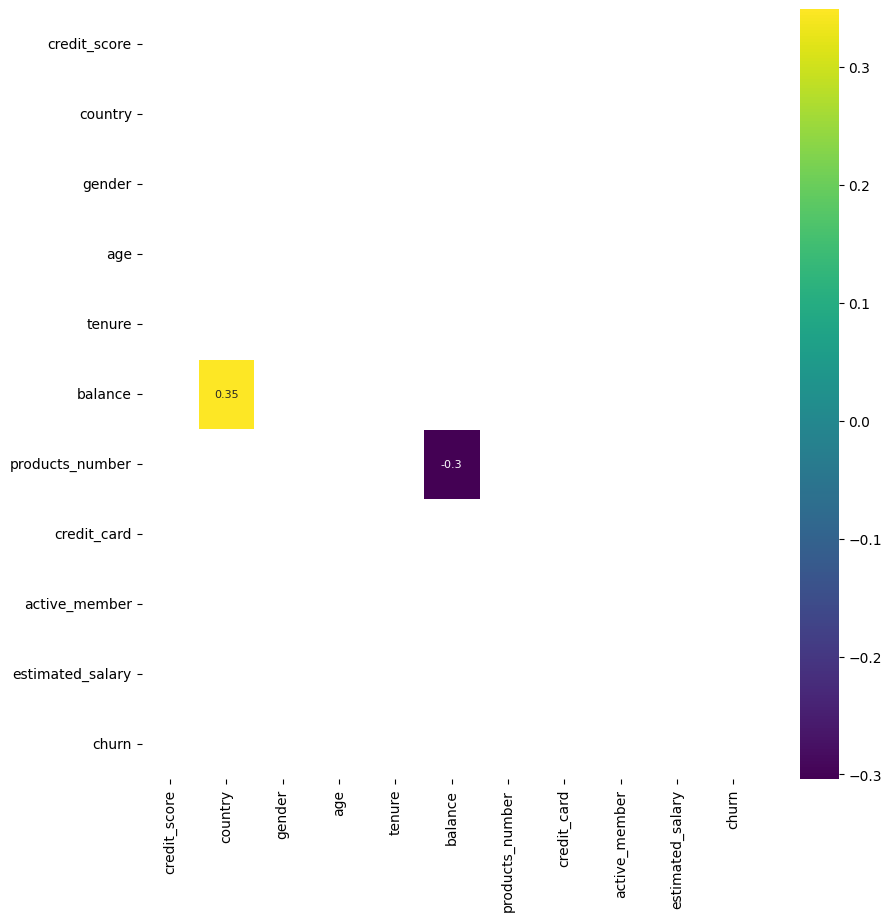



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



/tmp/ipykernel_927/3383299725.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


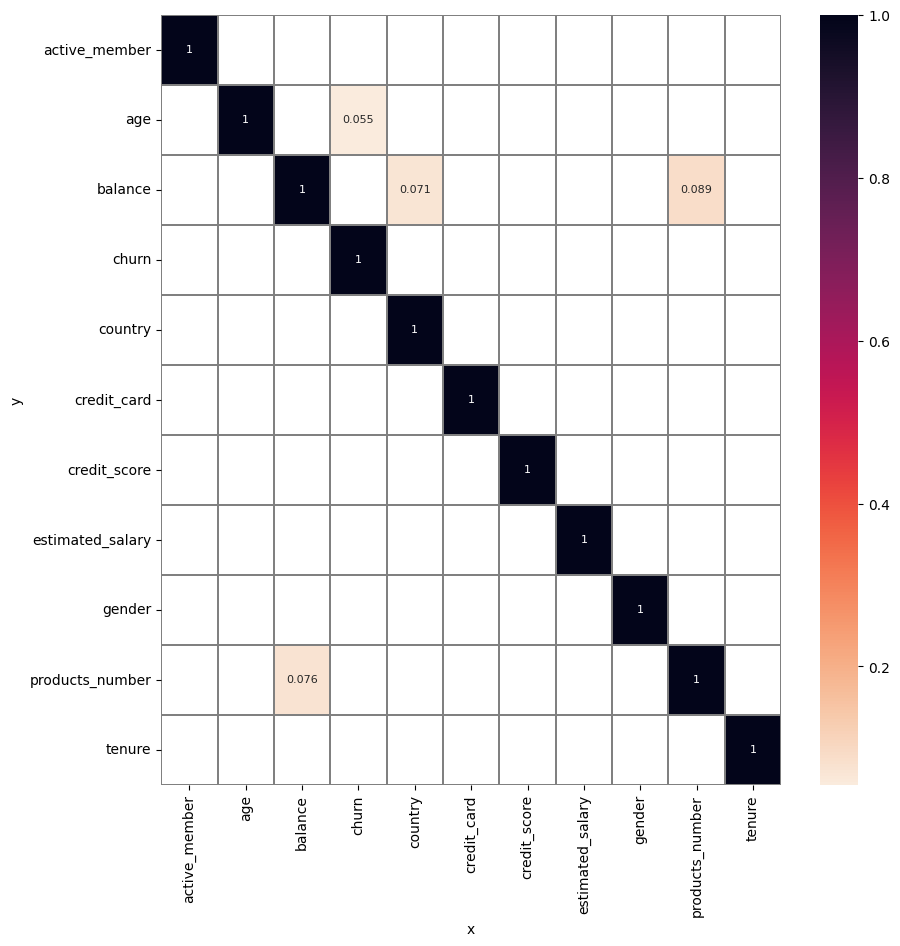

In [13]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.3, PPS_Threshold=0.05,
                  figsize=(10,10), font_annot=8)

 * The variables shows a relevant but very weak correlation level between the tenure and Churn.
 * PPS shows there is a very correlation between age and churn, balance and country and a very weak negative correlation with products number.

In [14]:
# use set(), which returns the unique values from the concatenated list.
top_n = 5
set(df_corr_pearson[:top_n].index.to_list() + df_corr_spearman[:top_n].index.to_list() + pps_matrix[:top_n].index.to_list())


{'active_member',
 'age',
 'balance',
 'churn',
 'country',
 'credit_score',
 'gender',
 'tenure'}

We will consider the following variables for dataframe based on the PPS and correlation level

In [15]:
vars_to_study = ['active_member', 'age', 'balance', 'churn', 'country', 'credit_score', 'gender', 'tenure']
vars_to_study

['active_member',
 'age',
 'balance',
 'churn',
 'country',
 'credit_score',
 'gender',
 'tenure']

We create a Dataframe for the Selected Variables for study with the churn

In [16]:
df_to_study = df.filter(vars_to_study)
df_to_study.head()

,active_member,age,balance,churn,country,credit_score,gender,tenure
0,1,42,0.00,1,0,619,0,2
1,1,41,83807.86,0,1,608,0,1
2,0,42,159660.80,1,0,502,0,8
3,0,39,0.00,0,0,699,0,1
4,1,43,125510.82,0,1,850,0,2


In [21]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['churn'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (8000, 11) 
TestSet shape: (2000, 11)


---

---

# Push outputs files to Repo

In [25]:
import os
try:
  # create here your folder
  os.makedirs(name='outputs/datasets/analysis')
except Exception as e:
  print(e)


## Save Train Set

In [26]:
TrainSet.to_csv("outputs/datasets/analysis/TrainSetCleaned.csv", index=False)

## Save Test Set

In [27]:
TestSet.to_csv("outputs/datasets/analysis/TestSetCleaned.csv", index=False)